In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import square, sawtooth
from scipy.integrate import quad
from math import*

Task 1:Energy balance Model (EBM Version 1)
    $$S(1-\alpha)=4\varepsilon\sigma T^{4}$$
    Where T=Global mean temperature of the earth (dependent variable);
    S=Solar radiation (variable,default value=$1372Wm^{-2}$);
    $\alpha$= Planetary albedo (variable, default value=0.3);
    $\varepsilon$=Emissivity of atmosphere(variable, default value=0.6);
    $\sigma$=Stephan-Boltzmann constant(constant value=$5.76\times 10^{-8}$);
    $\partial t=1.0*10^{21} secs$=time step

In [22]:
def EBM1(alpha,S,epsilon,sigma):# in kelvin
    T=(((1-alpha)*S)/(4*epsilon*sigma))**(1/4)#equation of earth temperature in equilibrium
    return T


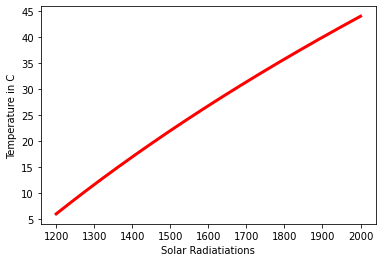

array([ 6.04741324,  6.05206688,  6.05672028, ..., 44.07316257,
       44.07633533, 44.07950799])

In [23]:
#i Change of global mean temperature of the earth vs variation of solar radiation
S=np.linspace(1200,2000,10000)
alpha=0.3
sigma=5.76*10**(-8)
epsilon=0.6
T=EBM1(alpha,S,epsilon,sigma)-273.15
plt.plot(S,T,c="r",linewidth='3')
plt.xlabel("Solar Radiatiations")
plt.ylabel("Temperature in C")
plt.show();
T

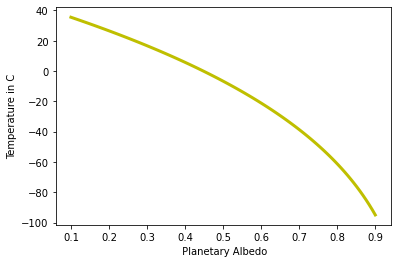

In [34]:
#ii Change of global mean temperature of the earth vs variation of planetary albedo

S=1372
alpha=np.linspace(0.1,0.9,100)
sigma=5.67*10**(-8)
epsilon=0.6
T=EBM1(alpha,S,epsilon,sigma)-273.15
plt.plot(alpha,T,c="y",linewidth='3')
plt.xlabel(" Planetary Albedo")
plt.ylabel("Temperature in C")
plt.show()

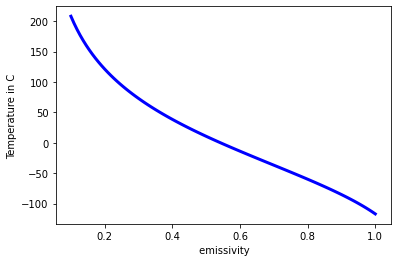

In [37]:
##iii Change of global mean temperature of the earth and 
##variation of planetary emissivity of the atmosphere.

S=1372
alpa=0.3
sigma=5.76*10**(-8)
epsilon=np.linspace(0.1,1,100)
T=EBM1(alpha,S,epsilon,sigma)-273.15
plt.plot(epsilon,T,c="b",linewidth='3')
plt.xlabel(" emissivity")
plt.ylabel("Temperature in C")
plt.show();

2.Task 2:Energy balance Model (EBM Version 2)
    $$C_{p}\frac{\partial T}{\partial t}=S(1-\alpha)-4\varepsilon\sigma T^{4}---(1)$$
    $$\Delta T=T_{2}-T_{1}$$
    $$\Delta t=t_{2}-t_{1}$$
    $$C_{p}\frac{T_{2}-T_{1}}{\Delta t} =  S(1-\alpha)-4\varepsilon\sigma T^{4}$$
    The value of $T_{2}$ i.e new temperature
$$ T_{2}=T_{1}+\frac{\Delta t}{C_{p}}[ S(1-\alpha)-4\varepsilon\sigma T^{4}]$$

In [38]:
Cp=1.05*10**(23)
dt=1.0*10**(21)
S1=1372
Alpha=0.3
Epsilon=0.6
Sigma=0.000000056
tau=2.4

In [39]:
def SO(S1=S1, alpha=Alpha):
    return (1-alpha)*S1

def OLR(T, tau=tau):
    return 4*tau * Sigma * T**4

In [40]:
T1 = 288
T2 = T1 + dt / Cp * ( SO(alpha=0.3) - OLR(T1, tau=0.57) )
print(T2)

288.7809427892907


In [41]:
def step_forward(T):
    return T + dt / Cp * ( SO(alpha=0.3) - OLR(T, tau=0.57) )

In [42]:
step_forward(288)

288.7809427892907

In [43]:
numsteps = 100
Tsteps = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps[n+1] = step_forward( Tsteps[n] )
#print(Tsteps)

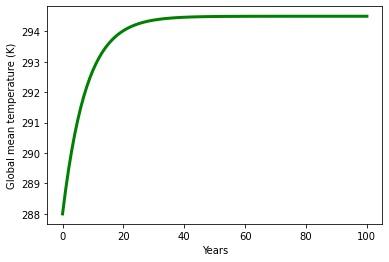

In [44]:
plt.plot(Years, Tsteps,color="g",linewidth=3)
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');